<a href="https://colab.research.google.com/github/MariaSanSal/PIA05/blob/main/PIA05_Guia_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa los módulos necesarios de la librería Keras. Sugerencia:


```
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
```



In [60]:

#	Importa la librerías
# Importa los módulos necesarios para construir una red neuronal profunda: Sequential, Dense y Flatten
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense

2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test. Sugerencia:


```
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```



In [61]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida.

*Sugerencia para normalizar:*


```
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
```
*Sugerencia de aplicación one-hot encoding para categorizar etiquetas:*


```
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
```




In [62]:

# Exploración de los datos
X_train.shape


(50000, 32, 32, 3)

In [63]:

len(y_train)

50000

In [64]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [65]:
print('Training data shape:', X_train .shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [66]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [67]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train, y_test = y_train.flatten(), y_test.flatten()

In [68]:

from tensorflow.keras.utils import to_categorical
to_categorical?
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

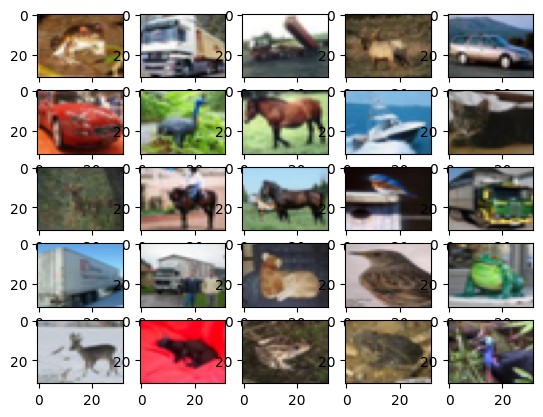

In [69]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1

plt.show()

4. Crea un modelo basado en redes neuronales profundas que tenga más de una capa de tipo Dense (Keras). Si es necesario, usa la capa Flatten al principio. Prueba un primer modelo lo más sencillo posible.

In [70]:
import keras

model = keras.Sequential([
    # capa para que tengamos una dimensión "aplanar". En nuestro caso necesario al tener varias dimensiones
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation = 'relu'), # capa con  neuronas y activación relu
    keras.layers.Dense(10, activation = 'softmax') # capa con  neuronas y activación softmax que se suele utilizar en problema de clasificación múltiple
])



5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo, inicialmente, con 20 epochs.

In [71]:

#usaremos Adam como indica, que además indican que presenta un mejor comportamiento general y
#es la que recomiendan en los primeros entrenamiento
#compile?
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
model.fit(X_train, y_train, epochs = 20)



Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 1.9976
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.7504
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.6898
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.6369
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.6029
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.5849
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 1.5662
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.5614
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.5485
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1.5368
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.5340
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.5219
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.5176
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.5025
Epoch 15/20
156

In [72]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,183,904 (4.52 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 789,270 (3.01 MB)

6. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.

In [73]:
import keras

model = keras.Sequential([
    # capa para que tengamos una dimensión "aplanar". En nuestro caso necesario al tener varias dimensiones
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation = 'softmax') # capa con  neuronas y activación softmax que se suele utilizar en problema de clasificación múltiple
])

model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
#model.fit(X_train, y_train, batch_size=128, epochs = 20, validation_data = (X_test, y_test))
model.fit(X_train, y_train, batch_size=256, epochs = 20, validation_data = (X_test, y_test))



Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2.0285 - val_loss: 1.8120
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.7836 - val_loss: 1.7025
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.7025 - val_loss: 1.6523
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.6522 - val_loss: 1.6185
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.6142 - val_loss: 1.6030
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.5898 - val_loss: 1.5734
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.5707 - val_loss: 1.5597
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 1.5470 - val_loss: 1.5589
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5361 - val_loss: 1.5692
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.5263 - val_loss: 1.5299
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.4954 - val_loss: 1.5339
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 

In [74]:
import keras

model = keras.Sequential([
    # capa para que tengamos una dimensión "aplanar". En nuestro caso necesario al tener varias dimensiones
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation ="softmax") # capa con  neuronas y activación softmax que se suele utilizar en problema de clasificación múltiple
])


model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
#model.fit(X_train, y_train, batch_size=128, epochs = 20, validation_data = (X_test, y_test))
model.fit(X_train, y_train, batch_size=256, epochs = 20, validation_data = (X_test, y_test))


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 2.1577 - val_loss: 1.8079
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 1.7776 - val_loss: 1.7116
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 1.6683 - val_loss: 1.6081
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 1.5984 - val_loss: 1.5497
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 1.5523 - val_loss: 1.5544
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 1.5120 - val_loss: 1.5072
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 1.4942 - val_loss: 1.5157
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 1.4627 - val_loss: 1.4828
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 1.4376 - val_loss: 1.4807
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 1.4119 - val_loss: 1.4634
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 1.4010 - val_loss: 1.4606
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━

In [75]:
import keras

model = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(512,input_shape=(32,32,3), activation="relu"),
  keras.layers.Dense(256, activation="relu"),
  keras.layers.Dense(128, activation="relu"),
   keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
model.fit(X_train,  y_train, batch_size=128, epochs = 20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 2.0467
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 1.6976
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 1.6126
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 1.5574
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 1.4914
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 1.4485
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 1.4250
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 1.3889
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 1.3592
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 1.3244
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - loss: 1.3055
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 1.2803
Epoch 13/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 1.2615
Epoch 14/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 1.2343
Epoch 15/20
391/391 ━━━━━━━━━

In [76]:
import keras

model = keras.Sequential([
 keras.layers.Flatten(input_shape=(32,32,3)),
 keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
  keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
 keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
  keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
   keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
   keras.layers.Dense(10, input_shape=(32,32,3),activation='softmax')
])

model.summary()


model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,  y_train, epochs = 20)

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,629,130 (10.03 MB)

 Trainable params: 2,629,130 (10.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.2486 - loss: 2.0112
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.3682 - loss: 1.7488
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4036 - loss: 1.6613
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4236 - loss: 1.5974
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.4419 - loss: 1.5469
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4552 - loss: 1.5156
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.4665 - loss: 1.4925
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.4732 - loss: 1.4586
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4876 - loss: 1.4316
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.4902 - loss: 1.4083
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.5050 - loss: 1.3793
Epoch 12

In [78]:
import keras

model = keras.Sequential([
 keras.layers.Flatten(input_shape=(32,32,3)),
  keras.layers.Dense(64, activation="relu"),
   keras.layers.Dense(128, activation="relu"),
   keras.layers.Dense(10, activation='softmax')
])

model.summary()


model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,  y_train, epochs = 20)

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,282 (805.79 KB)

 Trainable params: 206,282 (805.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2830 - loss: 1.9649
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3750 - loss: 1.7426
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4037 - loss: 1.6623
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4177 - loss: 1.6274
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4318 - loss: 1.5746
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4362 - loss: 1.5657
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4477 - loss: 1.5390
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4523 - loss: 1.5258
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4545 - loss: 1.5108
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4576 - loss: 1.5117
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4584 - loss: 1.5001
Epoch 12/20
1563/1563 ━━━

7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

In [79]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4571 - loss: 1.5156


[1.5177302360534668, 0.45419999957084656]

8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. Aquí tienes una posible forma de hacerlo (recuerda poner el nombre de tu modelo a la hora de aplicar el método predict):


```
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
```



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(0.5, 0, 'deer\xa0(dog)')

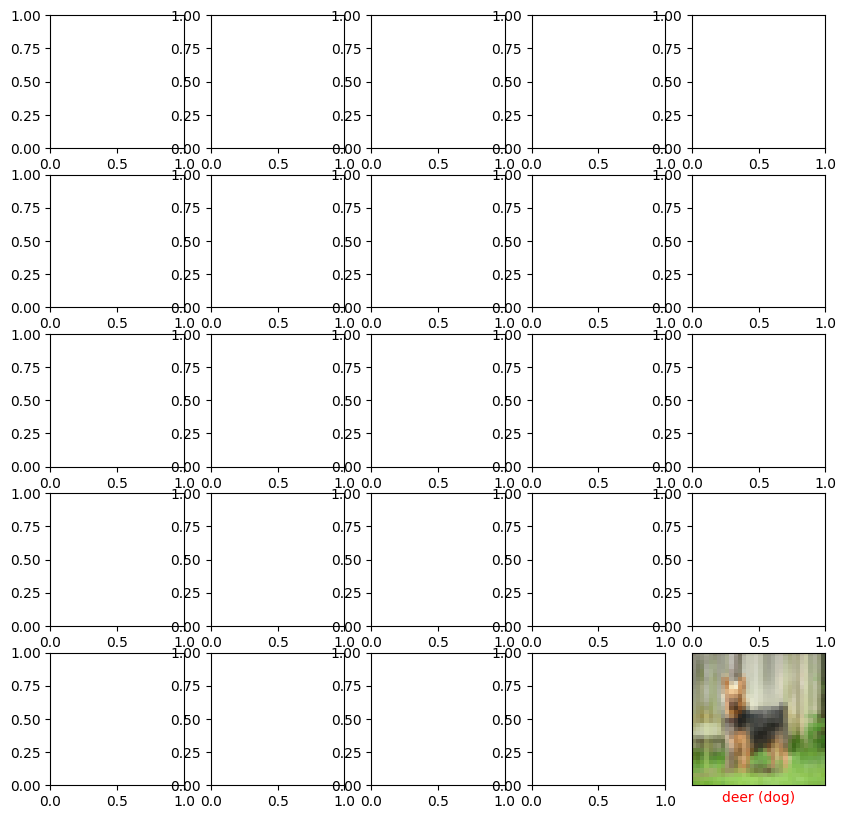

In [80]:
import matplotlib.pyplot as plt
predictions=model.predict(X_test)

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
plt.xticks([])
plt.yticks([])
plt.grid('off')
plt.imshow(X_test[i],cmap=plt.cm.binary)
predicted_label=predictions[i]
true_label=y_test[i]
if predicted_label.argmax()==true_label.tolist().index(1.):
  color="green"
else:
  color='red'
plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],class_names[true_label.tolist().index(1.)]),
color=color)